In [1]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import GRU, Dense, Dropout
# 
# class MyGRU:
#     sc_in = MinMaxScaler(feature_range=(0, 1))
#     sc_out = MinMaxScaler(feature_range=(0, 1))
# 
#     def __init__(self, epochs: int = 25, hidden_dim: int = 256, look_back: int = 60) -> None:
#         self.model = Sequential()
#         self.epochs = epochs
#         self.hidden_dim = hidden_dim
#         self.look_back = look_back
# 
#     @staticmethod
#     def create_dataset(dataset, look_back=60):
#         X, Y = [], []
#         for i in range(look_back, len(dataset)):
#             X.append(dataset[i - look_back:i, 0])
#             Y.append(dataset[i, 0])
#         return np.array(X), np.array(Y)
# 
#     def create_model(self) -> None:
#         self.model.add(GRU(units=self.hidden_dim, return_sequences=True, input_shape=(self.look_back, 1)))
#         self.model.add(Dropout(0.3))
#         self.model.add(GRU(units=self.hidden_dim // 2, return_sequences=True))
#         self.model.add(Dropout(0.3))
#         self.model.add(GRU(units=self.hidden_dim // 4))
#         self.model.add(Dense(25))
#         self.model.add(Dense(1))
#         self.model.summary()
#         self.model.compile(loss='mean_squared_error', optimizer='adam')
# 
#     def fit(self, data: np.ndarray) -> None:
#         scalled_data = self.sc_in.fit_transform(data)
#         self.sc_out.fit(data)
#         X, Y = self.create_dataset(scalled_data, self.look_back)
#         X = np.reshape(X, (X.shape[0], X.shape[1], 1))
#         train_size = int(len(X) * 0.7)
#         X_train, X_val = X[:train_size], X[train_size:]
#         Y_train, Y_val = Y[:train_size], Y[train_size:]
#         self.model.fit(X_train, Y_train, epochs=5, batch_size=64, validation_data=(X_val, Y_val), verbose=1)
# 
#     def predict(self, data: np.ndarray, actual_prices: int):
#         
#         inputs = data[len(data) - actual_prices - self.look_back:]
#         inputs = inputs.reshape(-1, 1)
#         inputs = self.sc_in.transform(inputs)
# 
#         X_test = []
#         for i in range(self.look_back, len(inputs)):
#             X_test.append(inputs[i - self.look_back:i, 0])
#         X_test = np.array(X_test)
# 
#         X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# 
#         predicted_prices = self.model.predict(X_test)
#         predicted_prices = self.sc_out.inverse_transform(predicted_prices)
# 
#         return predicted_prices


In [2]:
import yfinance as yf
import numpy as np
from LSTM import MyLSTM
# Pobranie danych
df = yf.download('ETH-USD', start='2019-01-01', end='2021-12-31')
data = df[['Close']].values

# Utworzenie modelu MyGRU
gru_model = MyLSTM()
gru_model.create_model()
gru_model.fit(data)

# Pobranie danych testowych
test_data = yf.download('ETH-USD', start='2022-01-01', end='2022-03-31')
actual_prices = test_data[['Close']].values
length = len(actual_prices)

[*********************100%***********************]  1 of 1 completed
C:\Users\Michał\Desktop\crypto\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 256)        │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 128)        │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 512,371 (1.95 MB)

 Trainable params: 512,371 (1.95 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - loss: 0.0047 - val_loss: 0.0328
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 7.0966e-04 - val_loss: 0.0222
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 1.8989e-04 - val_loss: 0.0059
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 2.1603e-04 - val_loss: 0.0073
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 1.7528e-04 - val_loss: 0.0056


[*********************100%***********************]  1 of 1 completed


In [3]:
total_dataset = np.concatenate((data, actual_prices), axis=0)

# Prognozowanie
predicted_prices = gru_model.predict(total_dataset, length)
print(predicted_prices)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step
[[4003.5671]
 [3989.8315]
 [3972.8413]
 [3953.8337]
 [3934.43  ]
 [3912.8074]
 [3886.7808]
 [3853.105 ]
 [3809.976 ]
 [3758.9062]
 [3701.49  ]
 [3642.2034]
 [3586.4473]
 [3536.0996]
 [3493.0508]
 [3458.3433]
 [3432.2952]
 [3412.571 ]
 [3396.6768]
 [3382.0364]
 [3366.0007]
 [3341.6184]
 [3304.156 ]
 [3254.6677]
 [3194.676 ]
 [3127.368 ]
 [3056.558 ]
 [2985.2332]
 [2917.8215]
 [2858.0337]
 [2808.006 ]
 [2769.624 ]
 [2744.517 ]
 [2730.8735]
 [2726.358 ]
 [2732.7463]
 [2750.1516]
 [2777.6633]
 [2814.3008]
 [2857.6099]
 [2906.3352]
 [2956.25  ]
 [3002.0688]
 [3040.5005]
 [3069.6116]
 [3089.7415]
 [3105.2375]
 [3118.3088]
 [3127.0303]
 [3129.3416]
 [3124.4468]
 [3110.9963]
 [3088.6636]
 [3059.4954]
 [3025.2483]
 [2988.1099]
 [2952.4429]
 [2921.3281]
 [2894.2407]
 [2874.7437]
 [2864.9944]
 [2864.8828]
 [2871.572 ]
 [2879.5112]
 [2885.8547]
 [2887.6172]
 [2882.8667]
 [2872.452 ]
 [2859.8347]
 [2845.8584]
 [2830.6892]
 [2814.9512]
 [2798.512 ]
 [2782.5674]

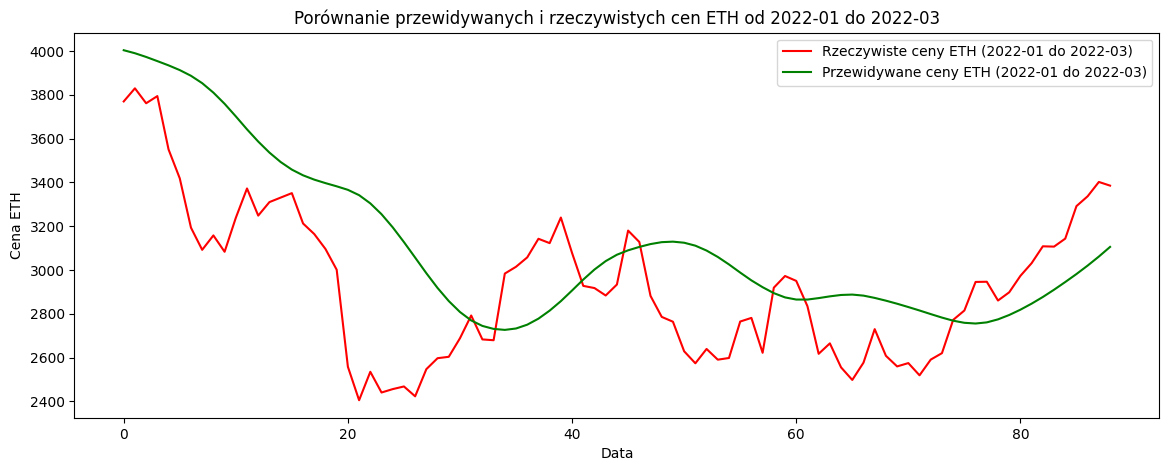

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))
plt.plot(actual_prices, color='red', label='Rzeczywiste ceny ETH (2022-01 do 2022-03)')
plt.plot(predicted_prices, color='green', label='Przewidywane ceny ETH (2022-01 do 2022-03)')
plt.title('Porównanie przewidywanych i rzeczywistych cen ETH od 2022-01 do 2022-03')
plt.xlabel('Data')
plt.ylabel('Cena ETH')
plt.legend()
plt.show()